In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
df = pd.read_csv("../data/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


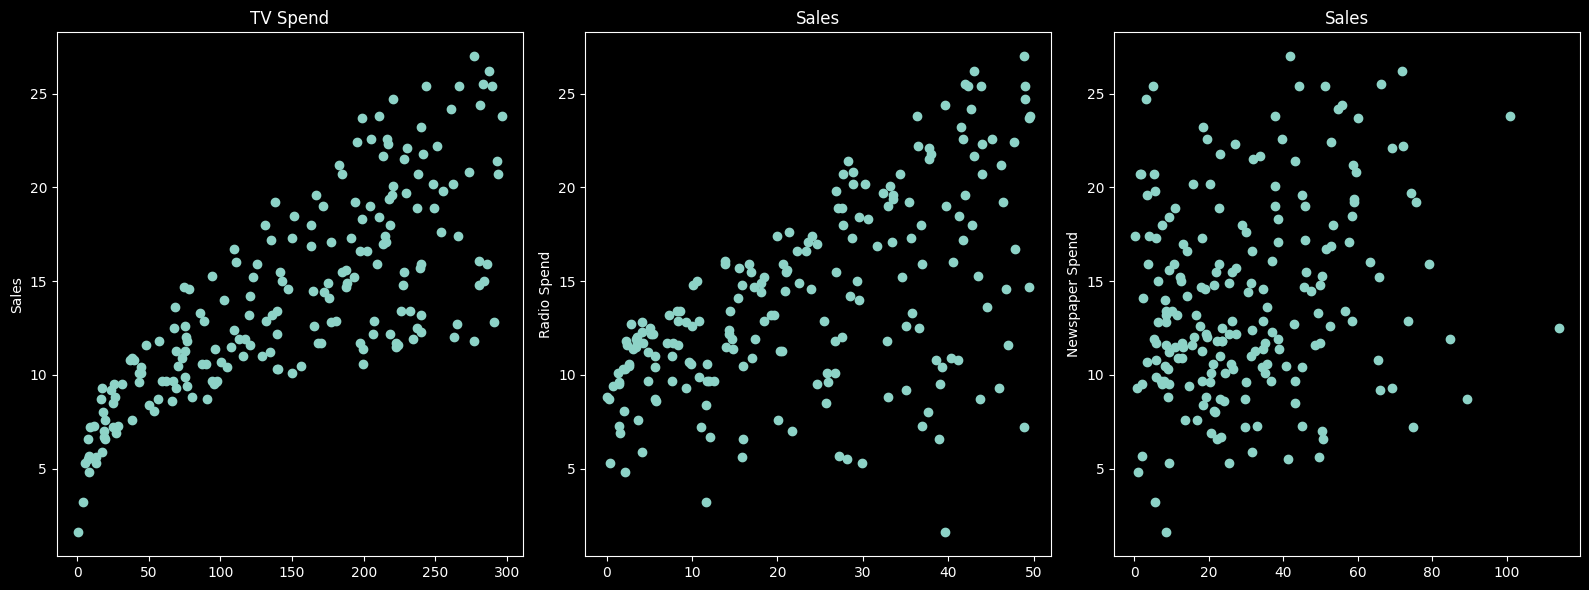

In [6]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel("Radio Spend")
axes[1].set_title("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel("Newspaper Spend")
axes[2].set_title("Sales")

plt.tight_layout();


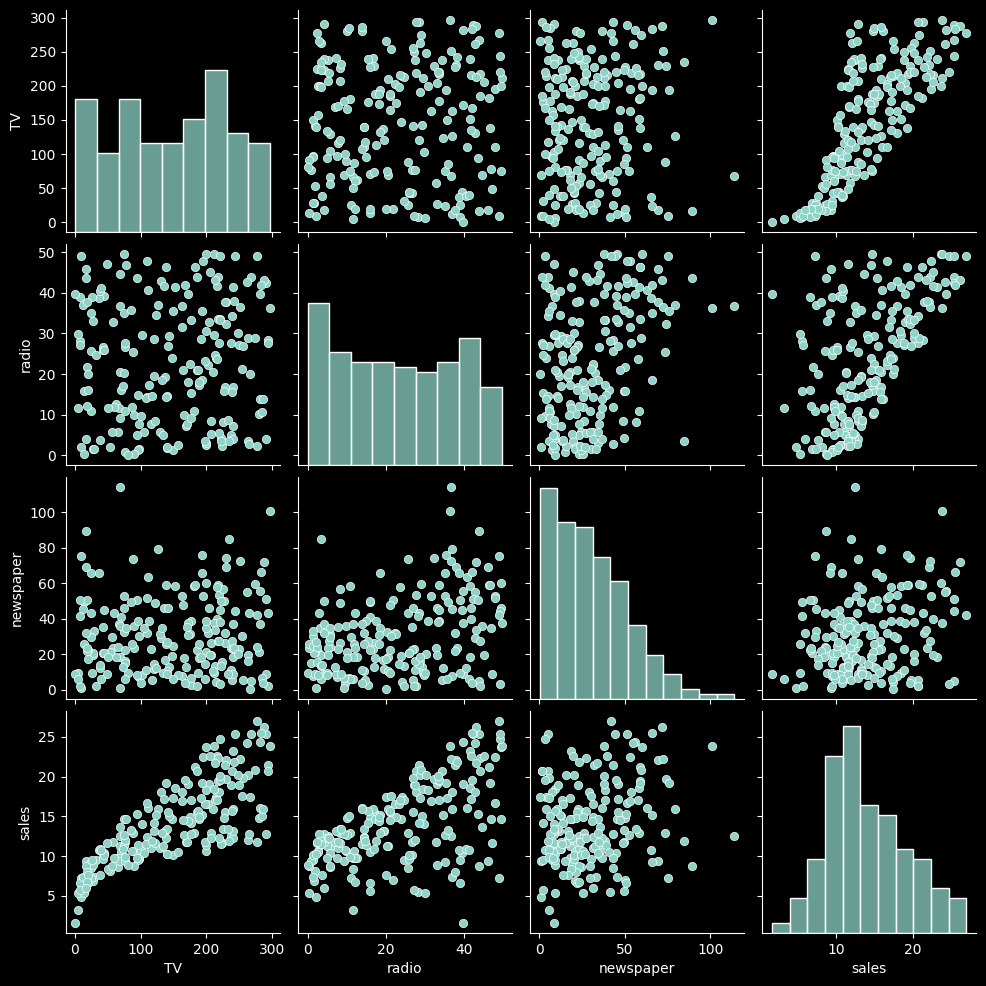

In [7]:
sns.pairplot(df)

In [9]:
X = df.drop('sales',axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [11]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#pip install scikit-learn


In [21]:
#help(train_test_split)

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [23]:
len(df)

200

In [25]:
len(X_train)

134

In [26]:
len(y_train)

134

In [27]:
len(X_test)

66

In [28]:
from sklearn.linear_model import LinearRegression

In [30]:
#help(LinearRegression)

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [33]:
model.predict(X_test)

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [34]:
test_prediction = model.predict(X_test) 

In [ ]:
# Now to compare 

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

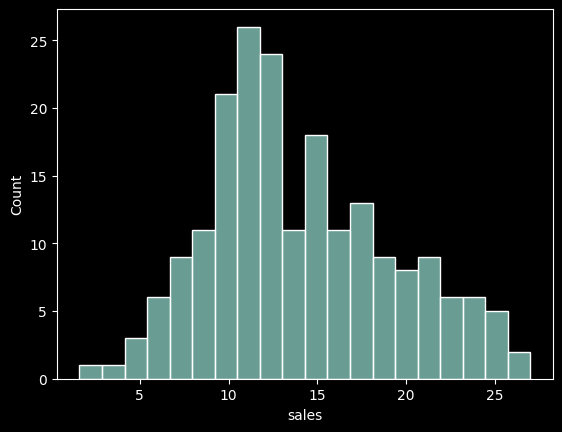

In [38]:
sns.histplot(data=df,x='sales',bins=20)

In [39]:
mean_absolute_error(y_test,test_prediction)

1.4937750024728962

In [41]:
np.sqrt(mean_squared_error(y_test,test_prediction))

1.9307843822347197

In [42]:
# plot tyhe residuals 

test_residuals = y_test - test_prediction

In [43]:
test_residuals

95     0.313269
15     1.213775
30    -0.267530
158   -3.510865
128    2.447891
         ...   
97     0.220480
31     0.443402
12    -1.923119
35    -3.800038
119   -0.306115
Name: sales, Length: 66, dtype: float64

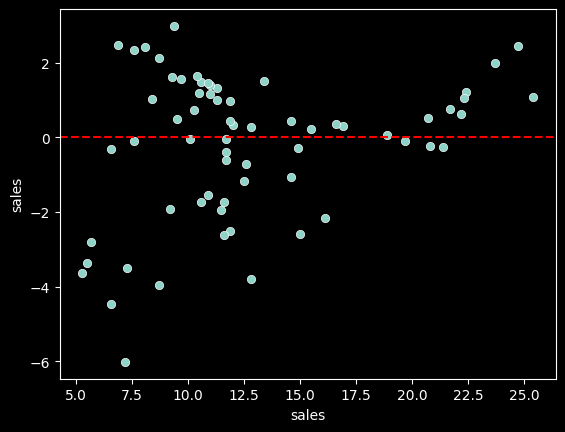

In [45]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--')

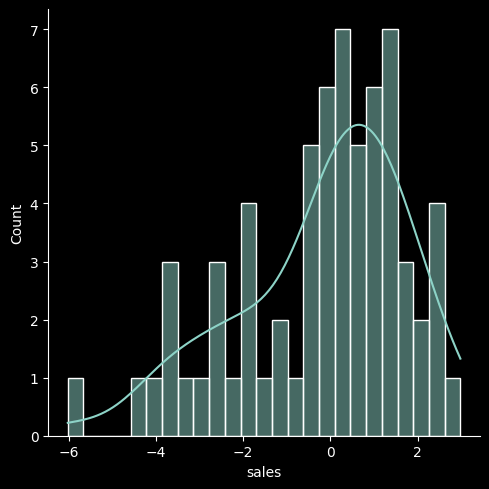

In [46]:
sns.displot(test_residuals,bins=25,kde=True)

In [47]:
import scipy as sp 

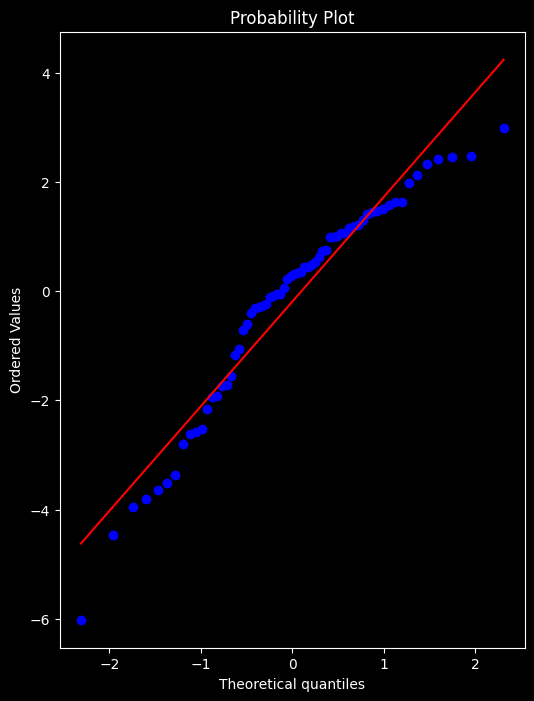

In [49]:
# create a figure and axis to plot on 
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed 
# we just want to see the plot , so we assign values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [50]:
final_model = LinearRegression()

In [51]:
final_model.fit(X,y) # full dataset

LinearRegression()

In [52]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [53]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [54]:
y_hat = final_model.predict(X)

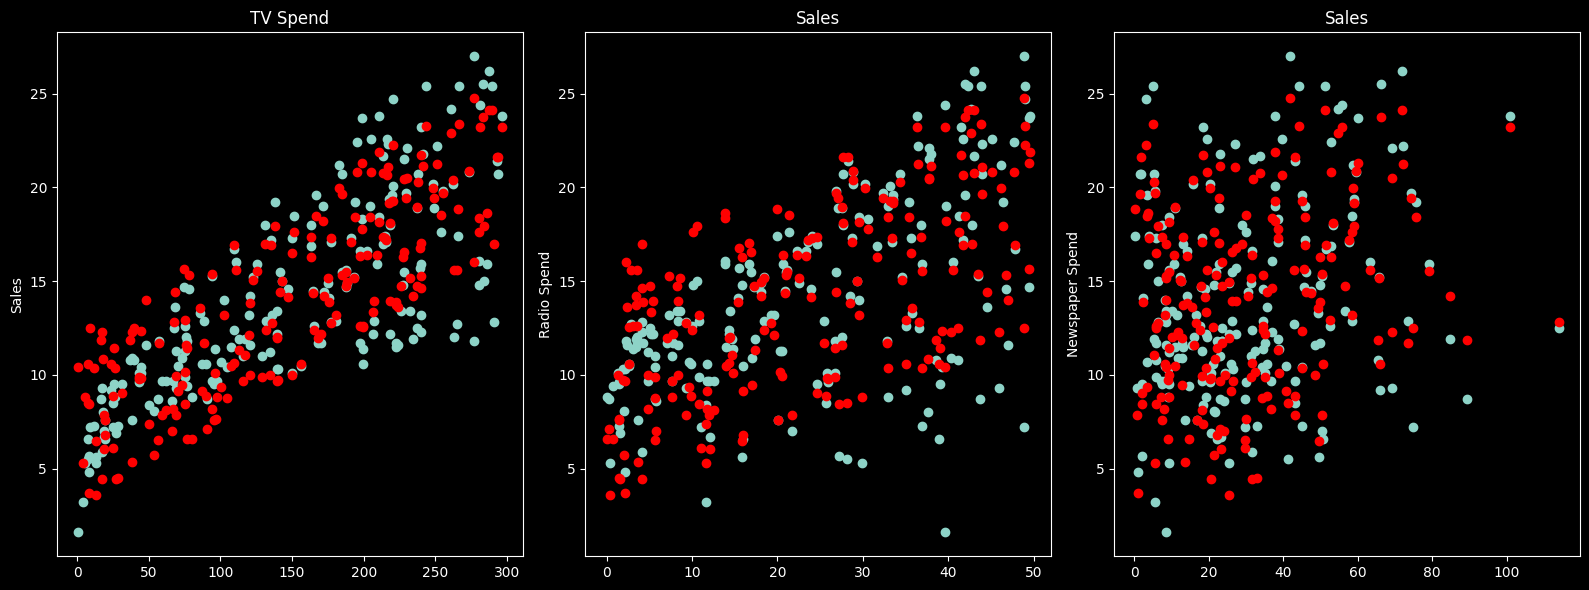

In [55]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_ylabel("Radio Spend")
axes[1].set_title("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel("Newspaper Spend")
axes[2].set_title("Sales")

plt.tight_layout();

In [56]:
from joblib import dump,load

In [57]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [58]:
loaded_model = load('final_sales_model.joblib')

In [59]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [60]:
X.shape

(200, 3)

In [61]:
# 149 TV , 22 RADIO , 12 NEWSPAPER , Sales = ? 
campaign = [[149,22,12]]

In [62]:
loaded_model.predict(campaign)

/Applications/My_Laborarory/Experiment/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])